In [58]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [59]:
airbnb<-data.frame(read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T))
install.packages("dplyr")  #aprovecho aquí para ir cargando esta librería, que luego se me olvida ...
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Mostrar las primeras 6 filas del dataframe

In [60]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [61]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
colnames(airbnb) <- newnames
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [62]:
airbnb$MetrosCuadrados <- round((airbnb$PiesCuadrados * 0.092903),2)
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [63]:
anyNA(airbnb$CodigoPostal) #compruebo que no tengo "Missing Values"

Codigos <- table(airbnb$CodigoPostal)
Codigos #Asi veo los codigos que son erróneos


airbnb$CodigoPostal[airbnb$CodigoPostal == "28002\n28002"] <- "28002" # corrijo el CP 28002\n28002
airbnb$CodigoPostal[airbnb$CodigoPostal == "28051\n28051"] <- "28051" # corrijo el CP 28051\n28051
airbnb$CodigoPostal[airbnb$CodigoPostal == "Madrid 28004"] <- "28004" # corrijo el CP Madrid 28004
airbnb$CodigoPostal[airbnb$CodigoPostal == "280013"] <- "28013"       # corrijo el CP 280013
airbnb$CodigoPostal[airbnb$CodigoPostal == "2804"] <- "28004"         # corrijo el CP 2804
airbnb$CodigoPostal[airbnb$CodigoPostal == "2805"] <- "28005"         # corrijo el CP 2805
airbnb$CodigoPostal[airbnb$CodigoPostal == "2815"] <- "28015"         # corrijo el CP 2815


#en la siguiente linea creo un subconjunto llamado airbnb2 que excluye los 439 codigos postales vacíos, 
# el que es igual a "-" y el que es igual a "28"
airbnb2 <- airbnb[airbnb$CodigoPostal != "" & airbnb$CodigoPostal != "-" & airbnb$CodigoPostal != "28" , ]  

#en la siguiente linea creo un subconjunto que excluye los 5 codigos postales que no empiezan por 28  
airbnb3 <- airbnb2[substr(airbnb2$CodigoPostal, start = 1, stop = 2) == "28", ]

airbnb[duplicated(airbnb3), ] #compruebo si hay duplicados
airbnbLimpio <- unique(airbnb3)  #y como me devuelve un listado, me quedo solo con los no duplicados

[1] FALSE


                        -        20013        20126         2015        25008 
         439            1            1            1            1            1 
       27004        27013           28        28001       280013        28002 
           1            1            1          231            1          170 
28002\n28002        28003        28004        28005        28006        28007 
           1          185         1794         1194          218          206 
       28008        28009        28010        28011        28012        28013 
         338          216          384          250         2060         1019 
       28014        28015        28016        28017        28018        28019 
         630          600           76          107           43          200 
       28020        28021        28022        28023        28024        28025 
         192           58           30           23           44          123 
       28026        28027        28028        28029

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1337,28015,Gaztambide,Apartment,Private room,2,2.5,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_50",NA,15,83,NA
1987,28018,Palomeras Bajas,Apartment,Entire home/apt,4,1.0,2,3,Real Bed,"Kitchen,Smoking allowed,Pets allowed,Heating,Family/kid friendly",NA,32,78,NA
2064,28008,Argüelles,Apartment,Entire home/apt,2,1.0,0,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Dryer,First aid kit,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,59,100,NA
3100,28012,Embajadores,Apartment,Entire home/apt,3,1.0,1,3,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,Hair dryer,Laptop friendly workspace",NA,65,93,NA
3506,28038,Numancia,Apartment,Entire home/apt,8,1.0,3,7,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Free parking on premises,Smoking allowed,Breakfast,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo",NA,65,92,NA
3552,28010,Trafalgar,Apartment,Entire home/apt,3,1.0,2,2,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Fire extinguisher,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,74,97,NA
4481,28028,Guindalera,Apartment,Private room,2,1.0,1,2,Real Bed,"TV,Internet,Kitchen,Heating,Washer,Essentials,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,19,71,NA
4814,28004,Justicia,Apartment,Private room,2,1.0,1,2,Real Bed,"Wireless Internet,Smoking allowed,Pets allowed,Elevator in building,Essentials,Shampoo",NA,30,90,NA
4850,28013,Palacio,Apartment,Private room,1,1.0,1,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Essentials,Hangers,Iron,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,39,100,NA


Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [134]:
airbnbLCPF<-factor(airbnbLimpio$CodigoPostal) #airbnbLCPF = airbnb Limpio Codigo Postal Factor

paste(levels(airbnbLCPF), collapse=", ")  #Asi veo los codigos ordenados de menor a mayor
summary (airbnbLCPF) #Asi veo los codigos ordenados y el numero de ocurrencias de cada uno

[1] "28001, 28002, 28003, 28004, 28005, 28006, 28007, 28008, 28009, 28010, 28011, 28012, 28013, 28014, 28015, 28016, 28017, 28018, 28019, 28020, 28021, 28022, 28023, 28024, 28025, 28026, 28027, 28028, 28029, 28030, 28031, 28032, 28033, 28034, 28035, 28036, 28037, 28038, 28039, 28040, 28041, 28042, 28043, 28044, 28045, 28046, 28047, 28048, 28049, 28050, 28051, 28052, 28053, 28054, 28055, 28056, 28058, 28060, 28094, 28105, 28850"

28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 28013 
  231   171   183  1792  1188   217   204   324   216   384   247  2043   998 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  621   598    76   107    43   199   192    58    30    23    44   122    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 
   16    63    90   103    19   494    32    67     1     3    58    17     1 
28053 28054 28055 28056 28058 28060 28094 28105 28850 
   85    12    12     1     1     1     1     1     1

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [135]:
"Los 5 CP con más entradas son: "
print(sort(table(airbnbLCPF), decreasing=T)[1:5])

"Y los 5 CP con menos son: "
print(sort(table(airbnbLCPF), decreasing=F)[1:5])


[1] "Los 5 CP con más entradas son: "

airbnbLCPF
28012 28004 28005 28013 28014 
 2043  1792  1188   998   621 


[1] "Y los 5 CP con menos son: "

airbnbLCPF
28048 28052 28056 28058 28060 
    1     1     1     1     1 


¿Cuales son los barrios que hay en el código postal 28012?

In [136]:
CP28012 <- filter(airbnbLimpio, CodigoPostal == "28012")

CP28012Factor <- factor(CP28012$Barrio)
"Los barrios que hay en CP 28012 son: "
unique(CP28012Factor)


[1] "Los barrios que hay en CP 28012 son: "

[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
11 Levels: Acacias Arapiles Atocha Cortes Delicias Embajadores Goya ... Universidad

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [137]:
summary (CP28012Factor)


Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             212               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1436               1              27              46             301 
    Universidad 
              4

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [138]:
Barrios <- c(airbnbLimpio$Barrio)  #creo el vector de barrios
BarriosFactor <- factor(Barrios)   #y lo factorizo

totalBarrios <- length(table(BarriosFactor))     #obtengo el numero total de barrios
print(paste("En todo el dataset de airbnb hay",totalBarrios,"barrios, y son estos:"))     
unique(BarriosFactor)


[1] "En todo el dataset de airbnb hay 125 barrios, y son estos:"


[1] Universidad                  Sol                         
  [3] Imperial                     Acacias                     
  [5] Chopera                      Delicias                    
  [7] Palos de Moguer              Embajadores                 
  [9] Cortes                       Atocha                      
 [11] Pacífico                     Adelfas                     
 [13] Estrella                     Ibiza                       
 [15] Jerónimos                    Niño Jesús                  
 [17] Palacio                      Justicia                    
 [19] Recoletos                    Goya                        
 [21] Fuente del Berro             Arapiles                    
 [23] Trafalgar                    Almagro                     
 [25] Guindalera                   Lista                       
 [27] Castellana                   El Viso                     
 [29] Prosperidad                  Valverde                    
 [31] Casa de Campo                El Goloso                   
 [33] Numancia                     Cármenes                    
 [35] Puerta del Angel             Lucero                      
 [37] San Isidro                   Campamento                  
 [39] Comillas                     Opañel                      
 [41] Vista Alegre                 Ciudad Jardín               
 [43] Hispanoamérica               Nueva España                
 [45] Castilla                     Bellas Vistas               
 [47] Cuatro Caminos               Castillejos                 
 [49] Vallehermoso                 Almenara                    
 [51] Valdeacederas                Berruguete                  
 [53] Gaztambide                   Rios Rosas                  
 [55] Peñagrande                   Argüelles                   
 [57] Puerta Bonita                Buenavista                  
 [59] Abrantes                     Orcasur                     
 [61] San Fermín                   Almendrales                 
 [63] Pradolongo                   Portazgo                    
 [65] Entrevías                    San Diego                   
 [67] Palomeras Bajas              Fontarrón                   
 [69] Vinateros                    Ventas                      
 [71] Pueblo Nuevo                 Quintana                    
 [73] Concepción                   San Juan Bautista           
 [75] Costillares                  Piovera                     
 [77] Canillas                     Pinar del Rey               
 [79] Apostol Santiago             San Andrés                  
 [81] Valdefuentes                 Butarque                    
 [83] Los Angeles                  Casco Histórico de Vicálvaro
 [85] Simancas                     Rejas                       
 [87] Salvador                     Casco Histórico de Barajas  
 [89] Pilar                        La Paz                      
 [91] Mirasierra                   Ciudad Universitaria        
 [93] Moscardó                     Palomeras Sureste           
 [95] Marroquina                   Media Legua                 
 [97] Los Rosales                  Casco Histórico de Vallecas 
 [99] Timón                        Corralejos                  
[101] Aluche                       Cuatro Vientos              
[103] Colina                       San Cristobal               
[105] Alameda de Osuna             Palomas                     
[107] Zofío                        Aguilas                     
[109] Legazpi                      Fuentelareina               
[111] Aravaca                      Ambroz                      
[113] Canillejas                   Valdezarza                  
[115] Amposta                      San Pascual                 
[117] Santa Eugenia                Arcos                       
[119] Rosas                        Valdemarín                  
[121] Aeropuerto                   El Plantío                  
[123] Hellín                       Pavones                     
[125] Orcasitas                   

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [139]:
"Los 5 barrios con más entradas son: "
print(sort(table(BarriosFactor), decreasing=T)[1:5])

"Y los 5 con menos son: "
print(sort(table(BarriosFactor), decreasing=F)[1:5])

[1] "Los 5 barrios con más entradas son: "

BarriosFactor
Embajadores Universidad     Palacio         Sol    Justicia 
       1784        1322        1046         894         761 


[1] "Y los 5 con menos son: "

BarriosFactor
     Orcasitas Cuatro Vientos      El Goloso     El Plantío  Fuentelareina 
             2              3              3              3              3 


¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [140]:
TipoAlquiler <- c(airbnbLimpio$TipoAlquiler)  #creo el vector de tipos de alquiler
TipoAlquilerFactor <- factor(TipoAlquiler)   #y lo factorizo

totalTipoAlquiler <- length(table(TipoAlquilerFactor))     #obtengo el numero total de barrios
print(paste(
    "En todo el dataset de airbnb hay",totalTipoAlquiler,"tipos distintos de alquiler, y son:"))     
unique(TipoAlquilerFactor)                                 #obtengo los tipos de alquileres

print("Y el numero de entradas por cada tipo es:")
summary(TipoAlquilerFactor)            #obtengo el numero de entradas por cada tipo de alquiler

[1] "En todo el dataset de airbnb hay 3 tipos distintos de alquiler, y son:"


[1] Private room    Entire home/apt Shared room    
Levels: Entire home/apt Private room Shared room

[1] "Y el numero de entradas por cada tipo es:"


Entire home/apt    Private room     Shared room 
           7646            4854             173

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



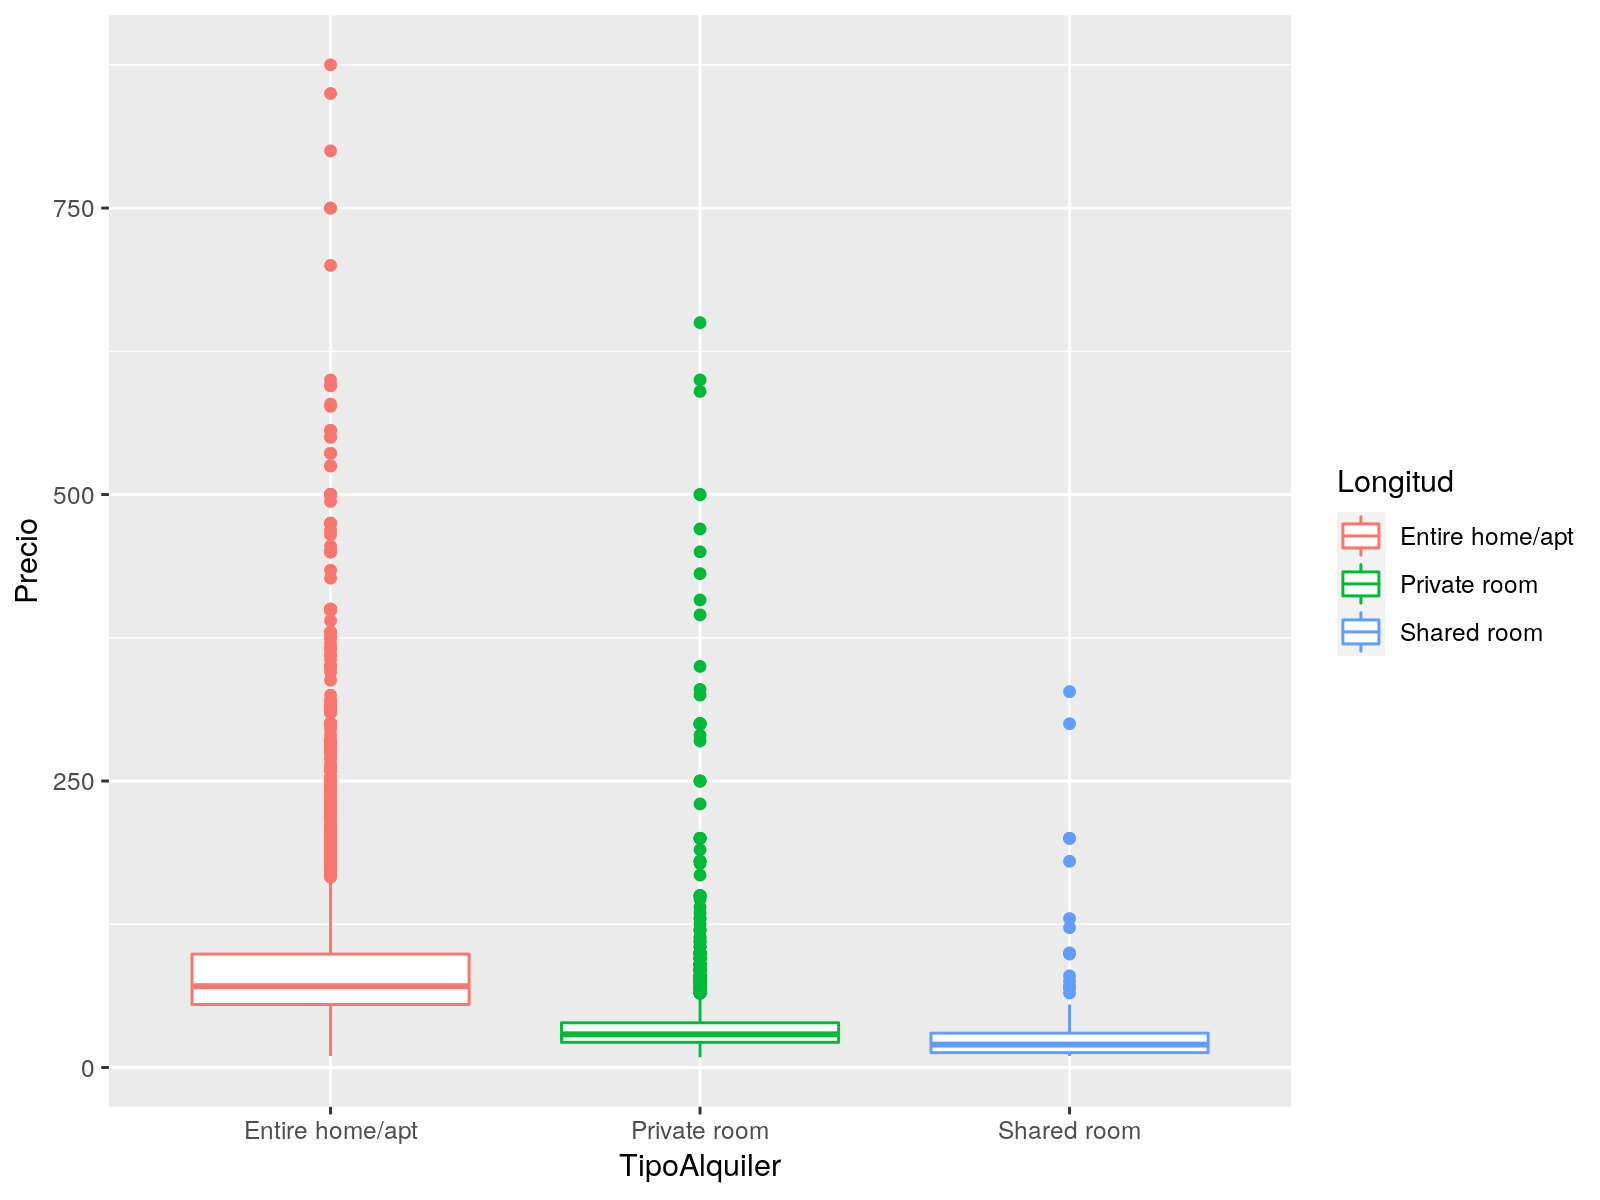

In [141]:
install.packages(c('ggplot2'), repos='https://cran.rstudio.com/')  # instalo ggplot
library("ggplot2")
options(repr.plot.height=6,repr.plot.width=8 , repr.plot.res = 200)

ggplot(data = airbnbLimpio, aes(x = TipoAlquiler, y = Precio, color = TipoAlquiler))+
        geom_boxplot()+scale_color_discrete(name="Longitud")
       

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa? ¿Con que test lo comprobarías?

TipoAlquiler,PrecioMedio
<fct>,<dbl>
Entire home/apt,87.09260
Private room,34.08776
Shared room,30.95954



	Shapiro-Wilk normality test

data:  PreciosEntireHome$Precio[0:5000]
W = 0.64802, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  PreciosPrivateRoom$Precio[0:5000]
W = 0.39333, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  PreciosSharedRoom$Precio[0:5000]
W = 0.45298, p-value < 2.2e-16


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.




	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 6929.3, df = 2, p-value < 2.2e-16


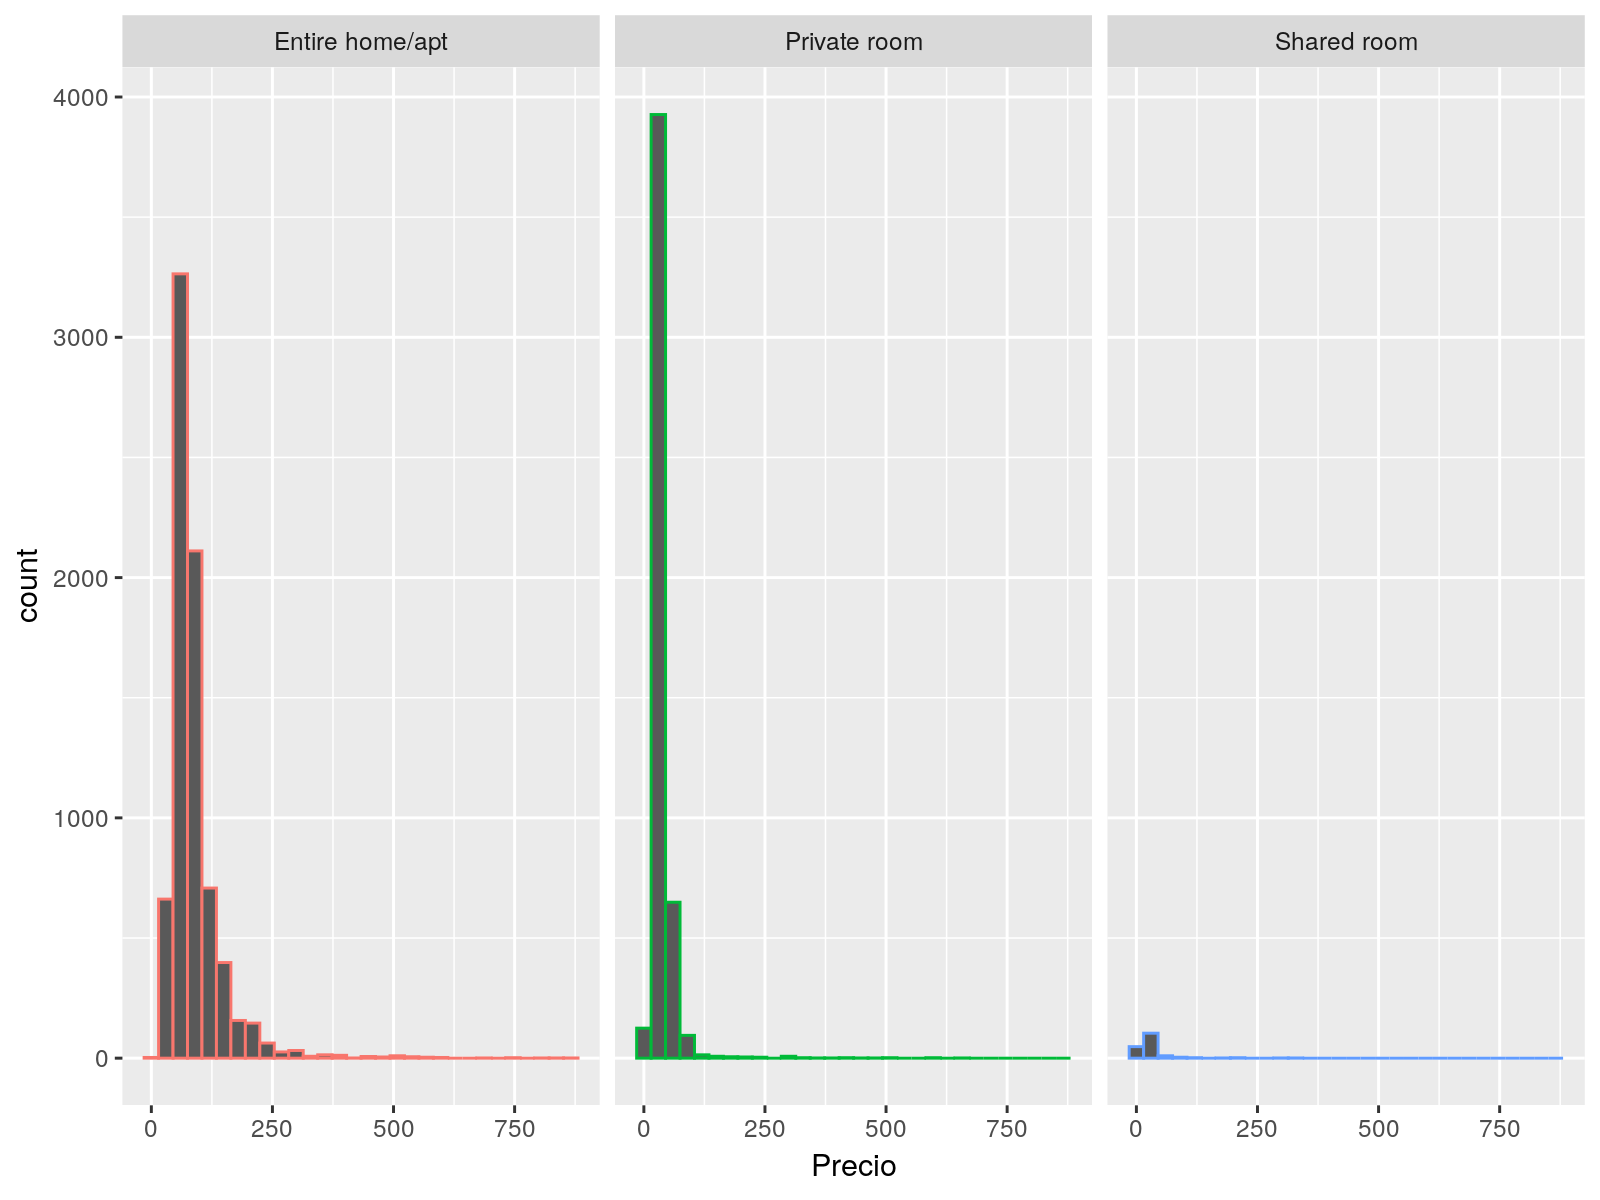

In [142]:
airbnbLimpio <- airbnbLimpio[!is.na(airbnbLimpio$Precio),]

DFTipoAlquiler <- aggregate(airbnbLimpio[ , c("Precio")], by = list (TipoAlquiler = airbnbLimpio$TipoAlquiler), FUN = mean)
names (DFTipoAlquiler)[2] <- "PrecioMedio"
DFTipoAlquiler

PreciosEntireHome <- subset(airbnbLimpio, airbnbLimpio$TipoAlquiler == "Entire home/apt", select = Precio)  
PreciosPrivateRoom <- subset(airbnbLimpio, airbnbLimpio$TipoAlquiler == "Private room", select = Precio)
PreciosSharedRoom <- subset(airbnbLimpio, airbnbLimpio$TipoAlquiler == "Shared room", select = Precio)                          

shapiro.test(PreciosEntireHome$Precio[0:5000])   #p-value < 2.2e-16 < 0.05: la distribucion para EntireHome NO es normal                       
shapiro.test(PreciosPrivateRoom$Precio[0:5000])   #p-value < 2.2e-16 < 0.05: la distribucion para PrivateRoom NO es normal                         
shapiro.test(PreciosSharedRoom$Precio[0:5000])   #p-value < 2.2e-16 < 0.05: la distribucion para PrivateRoom NO es normal                          

#Si hubiera salido es que Gaussiana ==> Hubiera hecho ANOVA test Welch
#Pero como las tres distribuciones son no Gaussianas paso a Kruskal-Wallis:
PreciosPorTipoAlquiler <- airbnbLimpio[ ,c("TipoAlquiler", "Precio")] #Subset de precios por tipo de alojamiento
PreciosPorTipoAlquiler <- PreciosPorTipoAlquiler[!is.na(PreciosPorTipoAlquiler$Precio), ]   #Excluyo los que Precio = NA

#Compruebo visulamente o graficamente que no estamos en distribuciones Gaussianas:
ggplot(data = PreciosPorTipoAlquiler, mapping = aes(x = Precio, colour = TipoAlquiler)) +
    geom_histogram() +
    facet_grid(. ~ TipoAlquiler) +
    theme(legend.position = "none")

#Paso el test de Krustal-Wallis
kruskal.test(Precio ~ TipoAlquiler, data = PreciosPorTipoAlquiler)

#Obtengo que Kruskal-Wallis chi-squared = 6929.3, df = 2, p-value < 2.2e-16 que al ser menor que 0.05 implica 
#que se puede rechar la hipotesis nula, o dicho de otro modo, que la mediana de precio es estadísticamente distinta
#dependiendo del tipo de alquiler (lo cual es intuitivamente esperable por otro lado).


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [145]:
airbnb_entire <- filter(airbnbLimpio, TipoAlquiler == "Entire home/apt")

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [74]:
BarriosEntire <- c(airbnb_entire$Barrio)  #creo el vector de barrios para el dataset airbnb_entire
BarriosEntireFactor <- factor(BarriosEntire)          #lo factorizo


"Los 5 barrios con más entradas para el tipo de alquiler Entire home/apt son: "
print(sort(table(BarriosEntireFactor), decreasing=T)[1:5])


[1] "Los 5 barrios con más entradas para el tipo de alquiler Entire home/apt son: "

BarriosEntireFactor
Embajadores Universidad     Palacio         Sol      Cortes 
       1197         958         753         685         556 


¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [75]:
EntirePvpMedio <- aggregate(airbnb_entire[,c("Precio")],by = list(Barrio = airbnb_entire$Barrio), FUN = mean) #agrego por Barrio
names (EntirePvpMedio)[2] <- "PrecioMedio"  #cambio nombre de la columna que muesra el precio medio

EntirePvpMedio <- EntirePvpMedio[with(EntirePvpMedio, order(-PrecioMedio)), ]  #ordeno EntirePvpMedio por PrecioMedio
EntirePvpMedio[1:5, ]   #imprimo los 5 primeros

,Barrio,PrecioMedio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
92,Recoletos,158.8968
43,El Plantío,150.0000
27,Casco Histórico de Barajas,141.2500


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [76]:
EntireRecuentoPorBarrios <- airbnb_entire%>% count (Barrio)   #Recuento del numero de entradas por barrio 
names (EntireRecuentoPorBarrios)[2] <- "NumeroEntradas"     #cambio nombre de la columna que muesra el numero de entradas

EntireBarrioFreq <- merge(EntirePvpMedio, EntireRecuentoPorBarrios, all = TRUE)
EntireBarrioFreq


Barrio,PrecioMedio,NumeroEntradas
<fct>,<dbl>,<int>
Abrantes,46.00000,3
Acacias,68.76271,59
Adelfas,69.56250,32
Aeropuerto,38.00000,2
Aguilas,54.50000,2
Alameda de Osuna,138.75000,4
Almagro,109.58065,93
Almenara,66.60870,23
Almendrales,65.00000,17


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [77]:
EntireBarrioFreq100 <- filter(EntireBarrioFreq, NumeroEntradas > 100)

EntireBarrioFreq100 <- EntireBarrioFreq100[with(EntireBarrioFreq100, order(-PrecioMedio)), ]

EntireBarrioFreq100 [1:5, ]

,Barrio,PrecioMedio,NumeroEntradas
,<fct>,<dbl>,<int>
8,Recoletos,158.89683,126
4,Goya,109.98540,137
9,Sol,100.60584,685
10,Trafalgar,98.86977,215
5,Justicia,98.69439,517


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

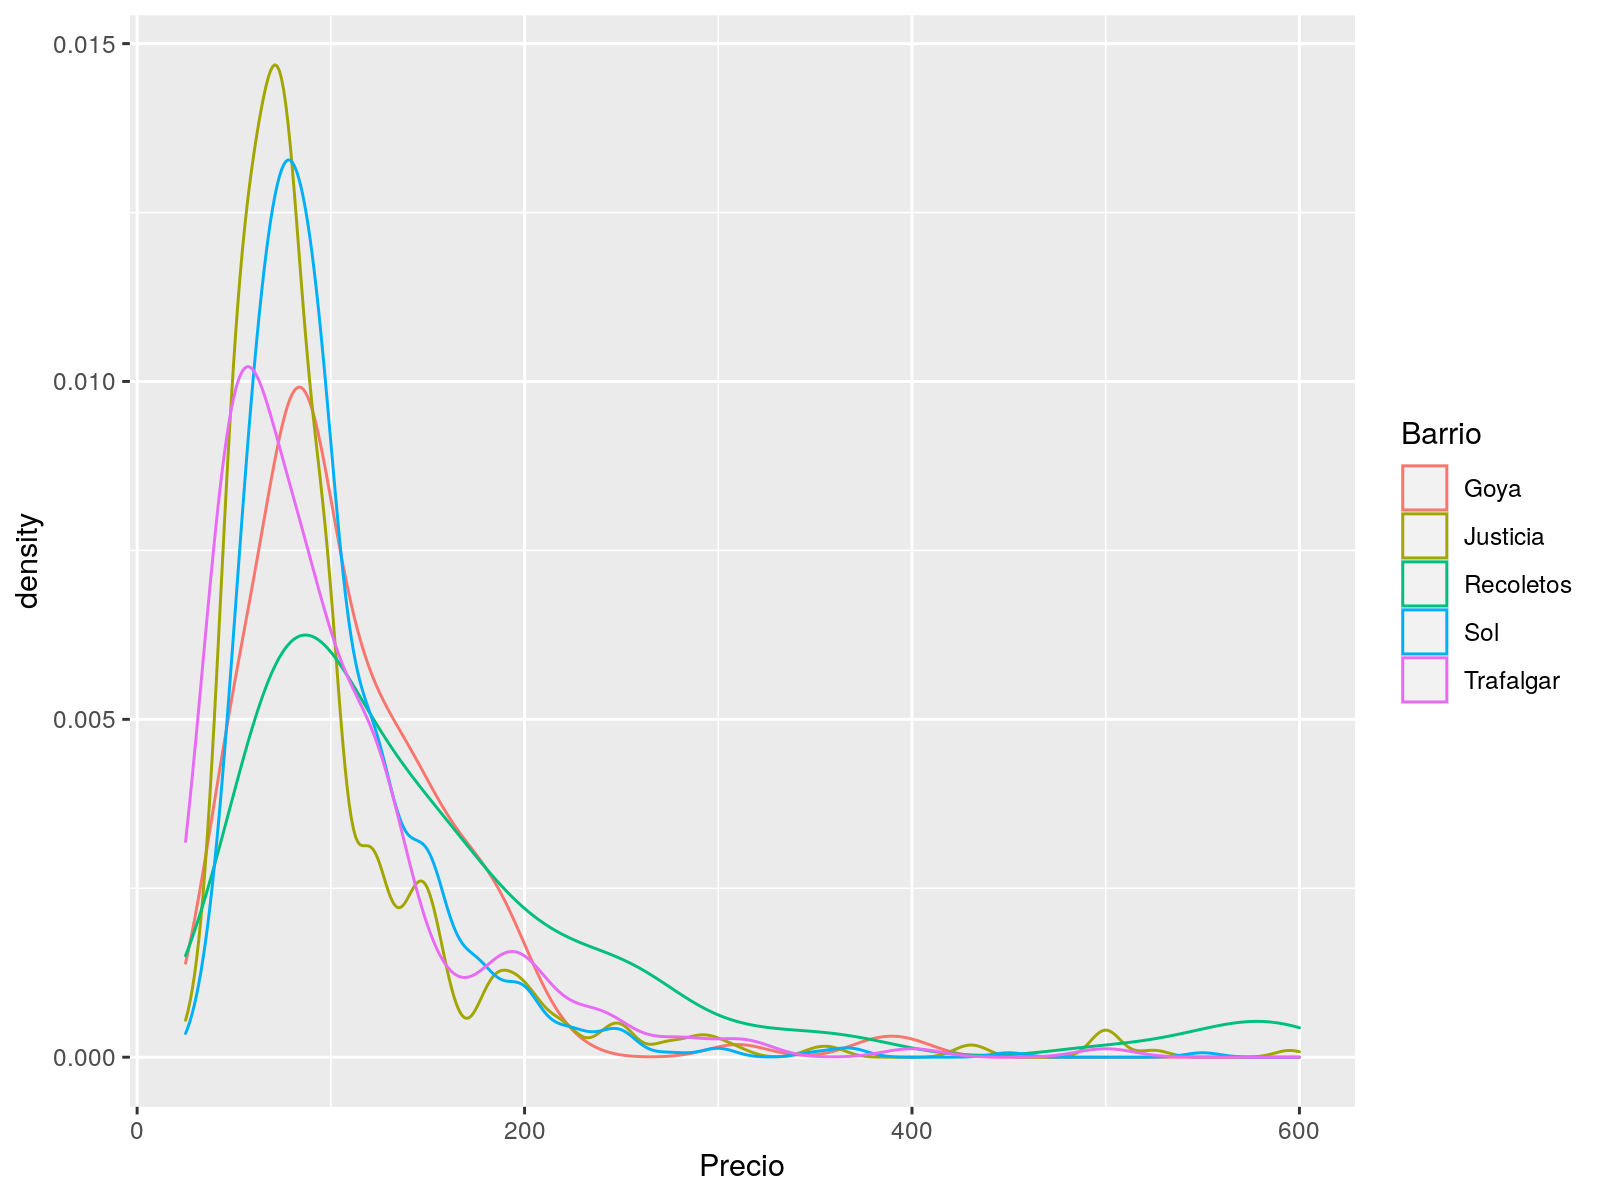

In [78]:
CincoBarrios <- EntireBarrioFreq100[(1:5) ,"Barrio"]   #Vector con los 5 barrios en cuestión

AirbnbCincoBarrios <- airbnb_entire %>% filter(Barrio %in% CincoBarrios) #Creo df a partir de airbnb_entire filtrnado por CioncoBarrios

AirbnbCincoBarriosPrecios <- AirbnbCincoBarrios[ , c("Barrio", "Precio")]  #Subset de precios por barrio (de los 5 barrios)

#Dibujo el diagrama de densidad de distribución

ggplot(data = AirbnbCincoBarriosPrecios, mapping = aes(x = Precio, colour = Barrio))  + geom_density()



Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [79]:
sapply(airbnb_entire, function(x) sum(is.na(x)))    #Veo si la columna PiesCuadrados tiene valores NA

EntireSupefNoNA <- airbnb_entire[!is.na(airbnb_entire$PiesCuadrados), ]    #Elimino los filas que PiesCuadrados = NA 
                                                                           #del df airbnb_entire

EntireSupefNoNA$MetrosCuadrados <- EntireSupefNoNA$PiesCuadrados * 0.092903  #Nueva columna con los
                                                                                       #metros cuadrados

EntireSuperficieMedia <- aggregate(EntireSupefNoNA[,c("MetrosCuadrados")],by = list(Barrio = EntireSupefNoNA$Barrio), 
                                   FUN = mean) #agrego por Barrio
       
names (EntireSuperficieMedia)[2]  <-  "SuperficieMedia"   #cambio nombre de la columna que muesra la superficie media    
       
EntireBarrioFreqSupeficie <- merge(EntireSuperficieMedia, EntireBarrioFreq100, by ="Barrio", all = FALSE)  #Hago el inner join
#EntireBarrioFreqSupeficie    
       
BarrioSuperficiePrecioEntradas <- EntireBarrioFreqSupeficie[with(EntireBarrioFreqSupeficie, order (-PrecioMedio)), ]     

BarrioSuperficiePrecioEntradas [1:5, ]

CodigoPostal          Barrio   TipoPropiedad    TipoAlquiler    MaxOcupantes 
              0               0               0               0               0 
      NumBanyos  NumDormitorios        NumCamas        TipoCama     Comodidades 
             14               8               9               0               0 
  PiesCuadrados          Precio      Puntuacion MetrosCuadrados 
           7295               0            1198            7295

,Barrio,SuperficieMedia,PrecioMedio,NumeroEntradas
,<fct>,<dbl>,<dbl>,<int>
8,Recoletos,26.66316,158.89683,126
4,Goya,51.68504,109.98540,137
9,Sol,44.35567,100.60584,685
10,Trafalgar,29.30426,98.86977,215
5,Justicia,28.52669,98.69439,517


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

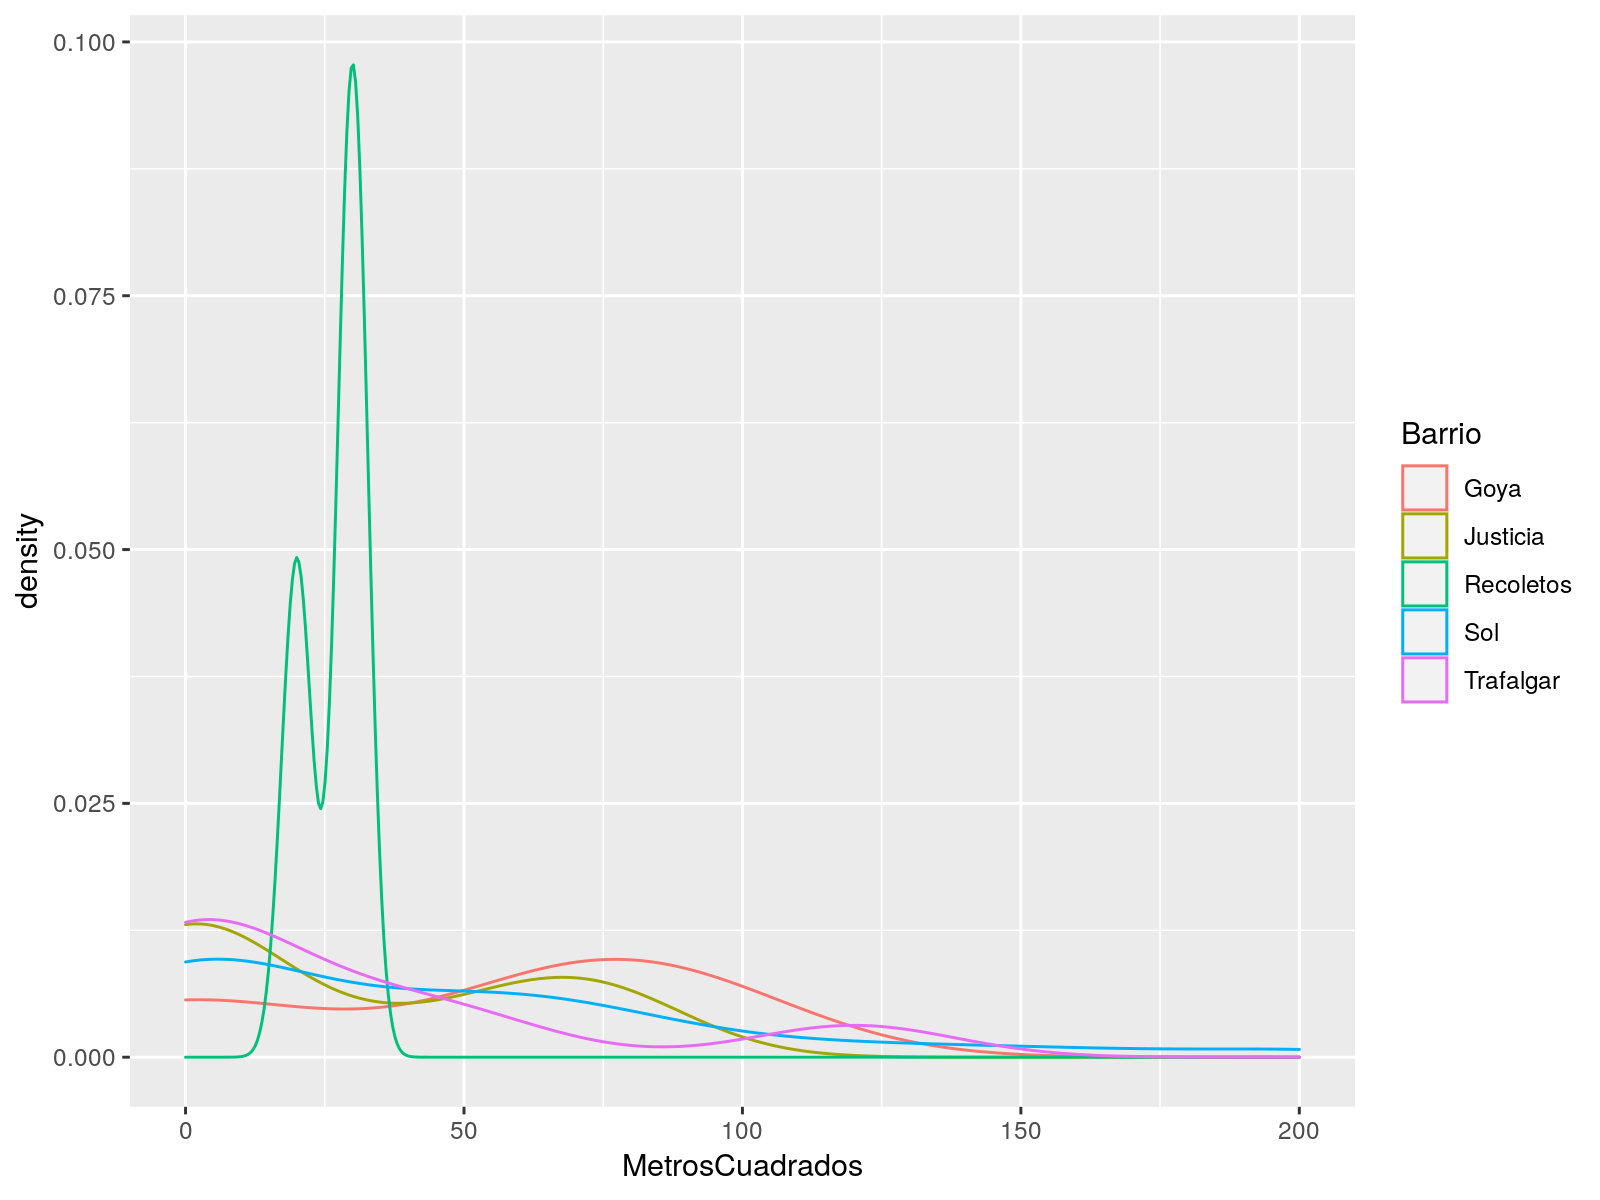

In [80]:
AirbnbCincoBarriosSuperficie <- AirbnbCincoBarrios[ , c("Barrio", "MetrosCuadrados")]  #Subset de superficie por barrio (de los 5 barrios)

#Elimino las filas con MetrosCuadrados = NA:
AirbnbCincoBarriosSuperficie <- AirbnbCincoBarriosSuperficie[!is.na(AirbnbCincoBarriosSuperficie$MetrosCuadrados), ]


#Dibujo el diagrama de densidad de distribución

ggplot(data = AirbnbCincoBarriosSuperficie, mapping = aes(x = MetrosCuadrados, colour = Barrio))  + geom_density()


Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

,Barrio,MetrosCuadrados
,<fct>,<dbl>
1,Sol,60.02
10,Sol,69.96
18,Sol,24.99
31,Justicia,49.98
71,Goya,65.03
79,Sol,200.02
94,Sol,49.98
100,Sol,134.99
161,Sol,85.01


[1] "El p-value de Sol es:  5.67107893772831e-07"
[1] "El p-value de Justicia es:  0.000641992409230825"
[1] "El p-value de Trafalgar es:  0.0127591027241118"
[1] "El p-value de Recoletos es:  0"
[1] "El p-value de Goya es:  0.519922431324765"



	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.6972, df = 4, p-value = 0.7912


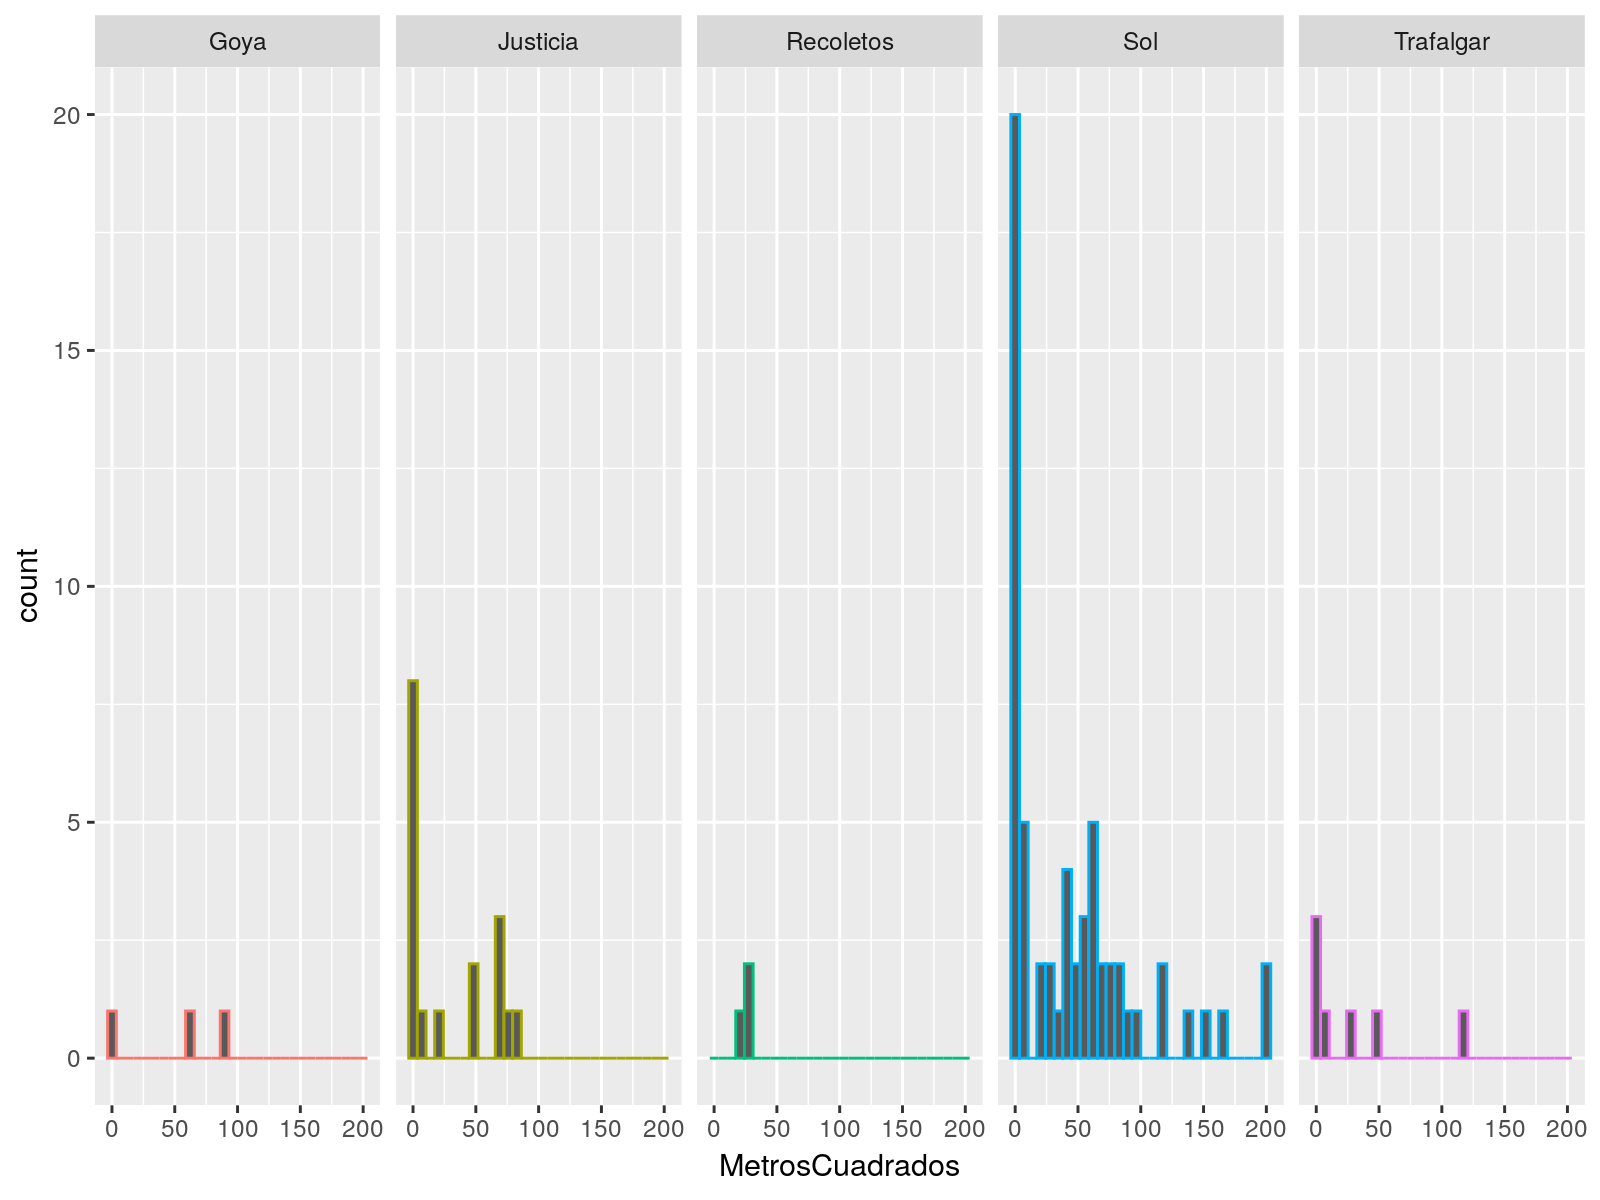

In [114]:

#Me quedo con las filas para las que MetrosCuadrados sea != 0  :
AirbnbCincoBarriosSuperficie[AirbnbCincoBarriosSuperficie$MetrosCuadrados != 0, ]

#Verifico la normalidad mediate Shapiro:

SuperficieSol <- subset(AirbnbCincoBarriosSuperficie, AirbnbCincoBarriosSuperficie$Barrio == "Sol", select = MetrosCuadrados)  
SuperficieJusticia <- subset(AirbnbCincoBarriosSuperficie, AirbnbCincoBarriosSuperficie$Barrio == "Justicia", select = MetrosCuadrados)
SuperficieTrafalgar <- subset(AirbnbCincoBarriosSuperficie, AirbnbCincoBarriosSuperficie$Barrio == "Trafalgar", select = MetrosCuadrados)
SuperficieRecoletos <- subset(AirbnbCincoBarriosSuperficie, AirbnbCincoBarriosSuperficie$Barrio == "Recoletos", select = MetrosCuadrados)       
SuperficieGoya <- subset(AirbnbCincoBarriosSuperficie, AirbnbCincoBarriosSuperficie$Barrio == "Goya", select = MetrosCuadrados)       

PValueSol <- shapiro.test(SuperficieSol$MetrosCuadrados)$p.value   
PValueJusticia <- shapiro.test(SuperficieJusticia$MetrosCuadrados)$p.value                        
PValueTrafalgar <- shapiro.test(SuperficieTrafalgar$MetrosCuadrados)$p.value   
PValueRecoletos <- shapiro.test(SuperficieRecoletos$MetrosCuadrados)$p.value   
PValueGoya <- shapiro.test(SuperficieGoya$MetrosCuadrados)$p.value   


print(paste("El p-value de Sol es: ", PValueSol))
print(paste("El p-value de Justicia es: ", PValueJusticia))
print(paste("El p-value de Trafalgar es: ", PValueTrafalgar))
print(paste("El p-value de Recoletos es: ", PValueRecoletos))
print(paste("El p-value de Goya es: ", PValueGoya))

# La única que sale con un p-valor > 0.05 es Goya, claro quie es porque los tres pisos tienen los mismos metros cuadrados

#Compruebo visulamente o graficamente que no estamos en distribuciones Gaussianas:
ggplot(data = AirbnbCincoBarriosSuperficie, mapping = aes(x = MetrosCuadrados, colour = Barrio)) +
    geom_histogram(bins=30) +
    facet_grid(. ~ Barrio) +
    theme(legend.position = "none")

#Paso el test de Krustal-Wallis ya que he comprobaado que no se cumple la condiciónd e normalidad
kruskal.test(MetrosCuadrados ~ Barrio, data = AirbnbCincoBarriosSuperficie)

#Obtengo que Kruskal-Wallis da p-value = 0.7912 que al ser mayor que 0.05 implica 
#que se puede admitir la hipotesis nula, o dicho de otro modo, que la mediana de la superficis es estadíticamente igual
#en todos los barrrios analizados


Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [ ]:
ESTO VA DE REGRESIONES LINEALES. PRIMERO VER LA CORRELACION ENTRE ESAS CUATRO VARIABLES. 
HABRÁ QUE FILTRAR QUITANDO PISOS QUE TIENEN MUY POCA SUPERFICIE COMO PARA SER CONSIDERADOS VERDADERAMENTE PISOS.
Y ESO DEBE MEJORAR LAS CORRELACIONES
VER LAS SIGUIENTES PREGUNTAS


In [149]:
?subset

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [179]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")

SubSetSol <- barrio_sol[   , c(6, 7, 5, 14)] #Subset incluyendo NumBanyos, NumDormitorios, MaxOcupantes y MetrosCuadrados

#Elimino los valores nulos del vector MetrosCuadrados

SubSetSol <- SubSetSol[!is.na(SubSetSol$MetrosCuadrados), ]

#Elimino los valores nulos del vector MetrosCuadrados
SubSetSol <- SubSetSol[SubSetSol$MetrosCuadrados != 0, ]
SubSetSol
#Calculo la correlación
round(cor(SubSetSol, method = "pearson"), 3)



,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
,<dbl>,<int>,<int>,<dbl>
10,1,1,4,60.02
19,1,1,4,69.96
30,1,1,2,24.99
334,2,4,8,200.02
393,1,1,4,49.98
399,2,2,10,134.99
800,1,1,4,85.01
809,1,1,2,40.04
909,1,0,3,60.02


,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.000,0.732,0.836,0.556
NumDormitorios,0.732,1.000,0.778,0.765
MaxOcupantes,0.836,0.778,1.000,0.703
MetrosCuadrados,0.556,0.765,0.703,1.000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


In [207]:
#Bueno lo que a mi sale es que la menos correlacion está entre MetrosCuadrados y NúmBanyos 
#que tiene un valor de 0.556 que podríamos considerar moderada/fuerte pero no sorprendentemente baja

#En todo caso voy a quitar las entradas con menos superficie tal y como dice el enunciado para ver el efecto:

SubSetSolOrdenado <- SubSetSol[order(SubSetSol$MetrosCuadrados), ]

for (i in c(10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65)) {
  SubSetSolOrdenado <- SubSetSolOrdenado[SubSetSolOrdenado$MetrosCuadrados > i, ]
  print(paste("Valor para ", i, ": "))
  tablita <- round(cor(SubSetSolOrdenado, method = "pearson"), 3)
  print (tablita)
  print("\r")
}

#Observo que cuando quito los de manos de 15 metros cuadrados la correlacion entre MEtrosCuadrados y NumBsños
#pasa de 0.556 a 0.604. Por tanto lo dejo así:
SubSetSolOrdenado <- SubSetSol[order(SubSetSol$MetrosCuadrados), ]
SubSetSolOrdenado <- SubSetSolOrdenado[SubSetSolOrdenado$MetrosCuadrados > 15, ]
#Calculo la correlación para Superficie mayor que 15 metros cuadrados
round(cor(SubSetSolOrdenado, method = "pearson"), 3)

[1] "Valor para  10 : "
                NumBanyos NumDormitorios MaxOcupantes MetrosCuadrados
NumBanyos           1.000          0.726        0.843           0.604
NumDormitorios      0.726          1.000        0.780           0.817
MaxOcupantes        0.843          0.780        1.000           0.706
MetrosCuadrados     0.604          0.817        0.706           1.000
[1] "\r"
[1] "Valor para  15 : "
                NumBanyos NumDormitorios MaxOcupantes MetrosCuadrados
NumBanyos           1.000          0.726        0.843           0.604
NumDormitorios      0.726          1.000        0.780           0.817
MaxOcupantes        0.843          0.780        1.000           0.706
MetrosCuadrados     0.604          0.817        0.706           1.000
[1] "\r"
[1] "Valor para  20 : "
                NumBanyos NumDormitorios MaxOcupantes MetrosCuadrados
NumBanyos           1.000          0.722        0.845           0.597
NumDormitorios      0.722          1.000        0.781           0.825


,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.000,0.726,0.843,0.604
NumDormitorios,0.726,1.000,0.780,0.817
MaxOcupantes,0.843,0.780,1.000,0.706
MetrosCuadrados,0.604,0.817,0.706,1.000


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [254]:
#Creo la tabla con el precio incluido:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
#Subset incluyendo NumBanyos, NumDormitorios, MaxOcupantes, MetrosCuadrados y PRecio
SubSetSol <- barrio_sol[   , c(6, 7, 5, 14, 12)] 

#Elimino los valores nulos del vector MetrosCuadrados

SubSetSol <- SubSetSol[!is.na(SubSetSol$MetrosCuadrados), ]

#Elimino los valores con superficie menos a 15 metros cuadradosdel vector MetrosCuadrados
SubSetSol <- SubSetSol[SubSetSol$MetrosCuadrados > 15 , ]

Combinacion <- lm(data=SubSetSol, formula = Precio ~ NumBanyos+MaxOcupantes+MetrosCuadrados+MetrosCuadrados)
summary(Combinacion)
confint(Combinacion)

# Como R-cuadrado múltiple: 0,8067 la precision no es buena y habría que elimnar una variable y comprobar si estima mejor

Combinacion2 <- lm(data=SubSetSol, formula = Precio ~ NumBanyos+NumDormitorios+MaxOcupantes)
summary(Combinacion2)

# Cuando quito NumBanyos R-cuadrado sale 0.8032
# Cuando quito NumDormitorios R-cuadrado sale 0.7352
# Cuando quito MaxOcupantes R-cuadrado sale 0.8029
# Cuando quito MetrosCuadrados R-cuadrado sale 0.7972

#Por tanto sería adecuado quitar NumDormitorios para que la estimación fuera mejor
#Y quedaría que el modelo es Precio = 7.87*NumBaños + 31.357*NumDormitorios + 4.18*MaxOcupantes + 24.547


Call:
lm(formula = Precio ~ NumBanyos + MaxOcupantes + MetrosCuadrados + 
    MetrosCuadrados, data = SubSetSol)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.650  -8.984   0.376  12.749 106.402 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)       3.9943    12.9728   0.308  0.76029   
NumBanyos        20.7314    15.3649   1.349  0.18734   
MaxOcupantes      5.8935     4.5409   1.298  0.20423   
MetrosCuadrados   0.5946     0.1705   3.486  0.00153 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.81 on 30 degrees of freedom
Multiple R-squared:  0.7352,	Adjusted R-squared:  0.7087 
F-statistic: 27.76 on 3 and 30 DF,  p-value: 8.574e-09


,2.5 %,97.5 %
(Intercept),-22.4997297,30.4882660
NumBanyos,-10.6478299,52.1106323
MaxOcupantes,-3.3802991,15.1672388
MetrosCuadrados,0.2462681,0.9428322



Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes, 
    data = SubSetSol)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.330 -15.806  -2.725  17.898  61.130 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      24.547     11.534   2.128   0.0417 *  
NumBanyos         7.870     13.730   0.573   0.5708    
NumDormitorios   31.357      6.264   5.006 2.29e-05 ***
MaxOcupantes      4.180      3.959   1.056   0.2995    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.71 on 30 degrees of freedom
Multiple R-squared:  0.7972,	Adjusted R-squared:  0.777 
F-statistic: 39.32 on 3 and 30 DF,  p-value: 1.622e-10


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [237]:
#La variable más fiable es la que tenga una p-valor más baja:
head(SubSetSol, 3)
cor(SubSetSol$Precio, SubSetSol[4]) < cor(SubSetSol$Precio, SubSetSol[2])

# sale que la más fiable es MetrosCuadrados
#Nota: por algún motivo que no logro identificar Si pongo SubSetSol$MetrosCuadrados me da error
# mientras que si pongo SubSetSol[4] no da error .....

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados,Precio
,<dbl>,<int>,<int>,<dbl>,<int>
10,1,1,4,60.02,75
19,1,1,4,69.96,100
30,1,1,2,24.99,65


MetrosCuadrados
TRUE


MetrosCuadrados
0.7855222


NumDormitorios
0.8784512


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [256]:

Combinacion3 <- lm(data=SubSetSol, formula = Precio ~ MetrosCuadrados)
summary(Combinacion3)
confint(Combinacion3)

#En este caso como MetrosCuadrados = 1.0090 significa que por cada metro cuadrado el precio aument en 1.009 euros


Call:
lm(formula = Precio ~ MetrosCuadrados, data = SubSetSol)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.342 -15.695  -0.737   8.900 118.472 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      30.1325    12.5437   2.402   0.0223 *  
MetrosCuadrados   1.0090     0.1405   7.181 3.75e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.2 on 32 degrees of freedom
Multiple R-squared:  0.617,	Adjusted R-squared:  0.6051 
F-statistic: 51.56 on 1 and 32 DF,  p-value: 3.746e-08


,2.5 %,97.5 %
(Intercept),4.5818201,55.683098
MetrosCuadrados,0.7227976,1.295267


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [259]:
Combinacion4 <- lm(data=SubSetSol, formula = Precio ~ NumDormitorios)
summary(Combinacion4)
confint(Combinacion4)

#En este caso como NumDormitorios = 40.983 significa que por cada habitación el precio aumenta en 40.983 euros


Call:
lm(formula = Precio ~ NumDormitorios, data = SubSetSol)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.559 -16.628  -5.628  19.109  54.441 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      40.646      8.138   4.994 2.02e-05 ***
NumDormitorios   40.983      3.941  10.400 8.62e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.5 on 32 degrees of freedom
Multiple R-squared:  0.7717,	Adjusted R-squared:  0.7645 
F-statistic: 108.2 on 1 and 32 DF,  p-value: 8.617e-12


,2.5 %,97.5 %
(Intercept),24.06873,57.2226
NumDormitorios,32.95556,49.0098


¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [ ]:
RESPECTO DE TODOS LOS APARTAMENTOS. PROPORCION DE APARTAMENTOS DE TRES DORMITORIOS DIVIDIDO ENTRE EL TOTAL DE APARTAMENTOS.
Y LUEGO COMBINO BINOM.TEST PARA SACAR LAS PROPORCIONES

In [264]:
probabilidad <- length(SubSetSol$NumDormitorios[SubSetSol$NumDormitorios == 3]) / length(SubSetSol)
probabilidad
#La probabilidad es de un 40%
NDormitorios <- c (SubSetSol$NumDormitorios)
IntvloConfianza <- sd(NDormitorios) *sqrt(length(SubSetSol))
IntvloConfianza
#El intervalo de confianza es 2.9136411606157

[1] 0.4

[1] 2.913641